In [1]:
# Import TensorFlow library for deep learning operations
import tensorflow as tf

# Import MNIST dataset for digit recognition
from tensorflow.keras.datasets import mnist

# Import utility for one-hot encoding labels
from tensorflow.keras.utils import to_categorical

# Import image data generator for data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Import Matplotlib for plotting
import matplotlib.pyplot as plt

# Import NumPy for numerical operations
import numpy as np

# Load the MNIST dataset into training and test sets
(training_X, training_y), (test_X, test_y) = mnist.load_data()


In [2]:
# Reshape training and test sets to add a channel dimension
training_X = training_X.reshape(training_X.shape[0], 28, 28, 1)
test_X = test_X.reshape(test_X.shape[0], 28, 28, 1)

# Convert labels to one-hot encoding
training_y = to_categorical(training_y)
test_y = to_categorical(test_y)

# Normalize pixel values to range [0, 1]
training_X = training_X.astype('float32') / 255
test_X = test_X.astype('float32') / 255


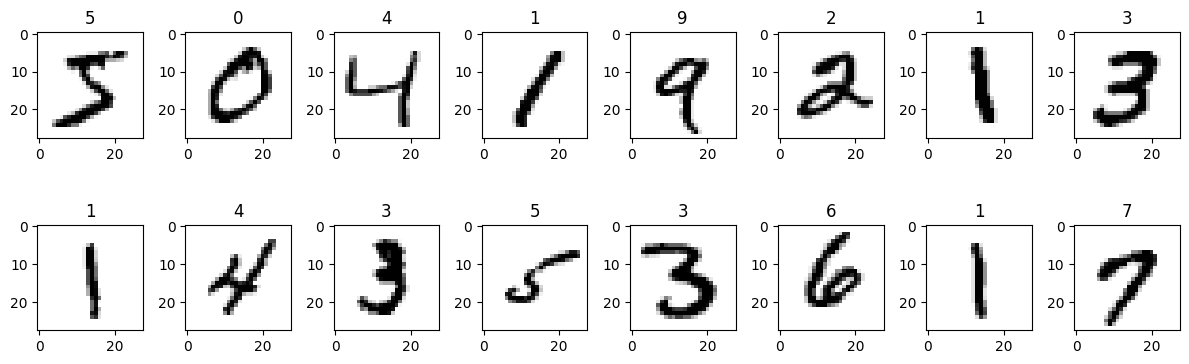

In [3]:
# Define the number of rows and columns for subplot arrangement
rows = 2
columns = 8
num = rows * columns

# Select a subset of images and labels for visualization
images = training_X[0:num]
labels = training_y[0:num]

# Create a figure and axes for subplots
fig, axes = plt.subplots(rows, columns, figsize=(1.5 * columns, 2 * rows))

# Plot each image with its corresponding label
for i in range(num):
    ax = axes[i // columns, i % columns]
    ax.imshow(images[i].reshape(28, 28), cmap='gray_r')
    label = np.argmax(labels[i])
    ax.set_title(f'{label}')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [4]:
# Apply various transformations to augment the training data for better generalization
# The transformations include rotation, width and height shift, shear, and zoom
gendata = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=15,
    zoom_range=[0.5, 1.5]
)

# Fit the image data generator on the training set
gendata.fit(training_X)

BEFORE:



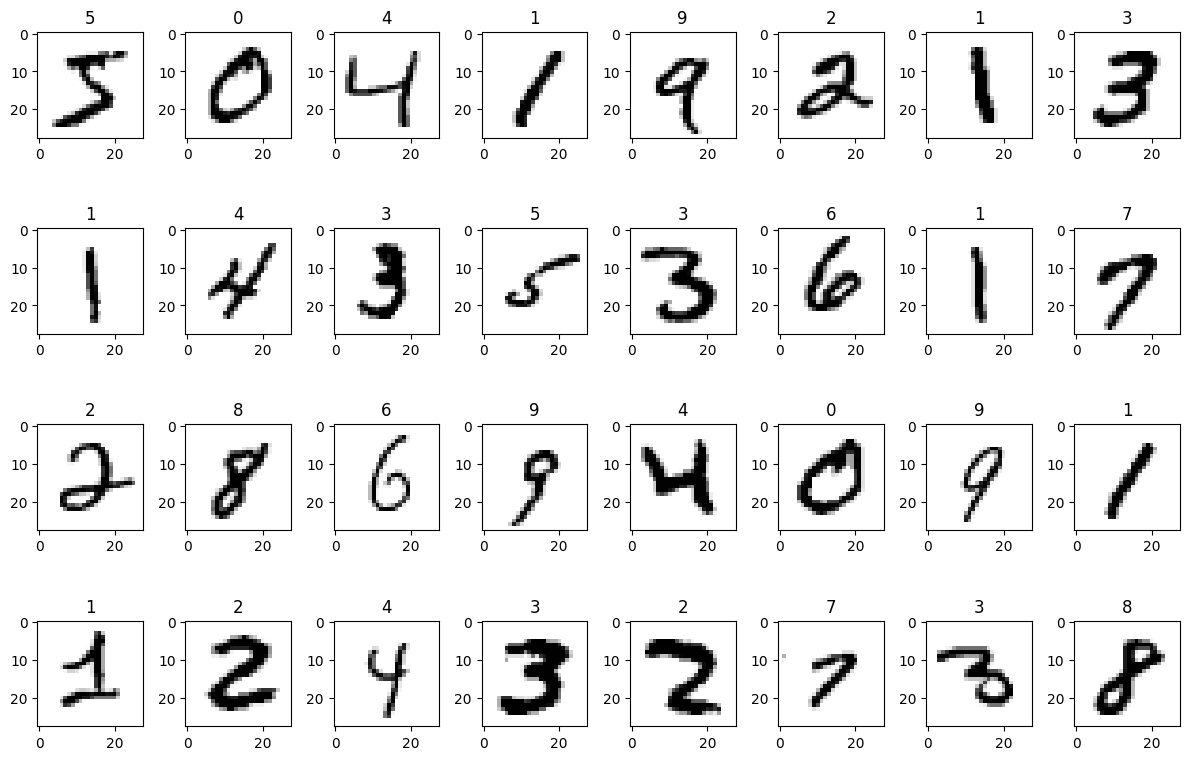

AFTER:



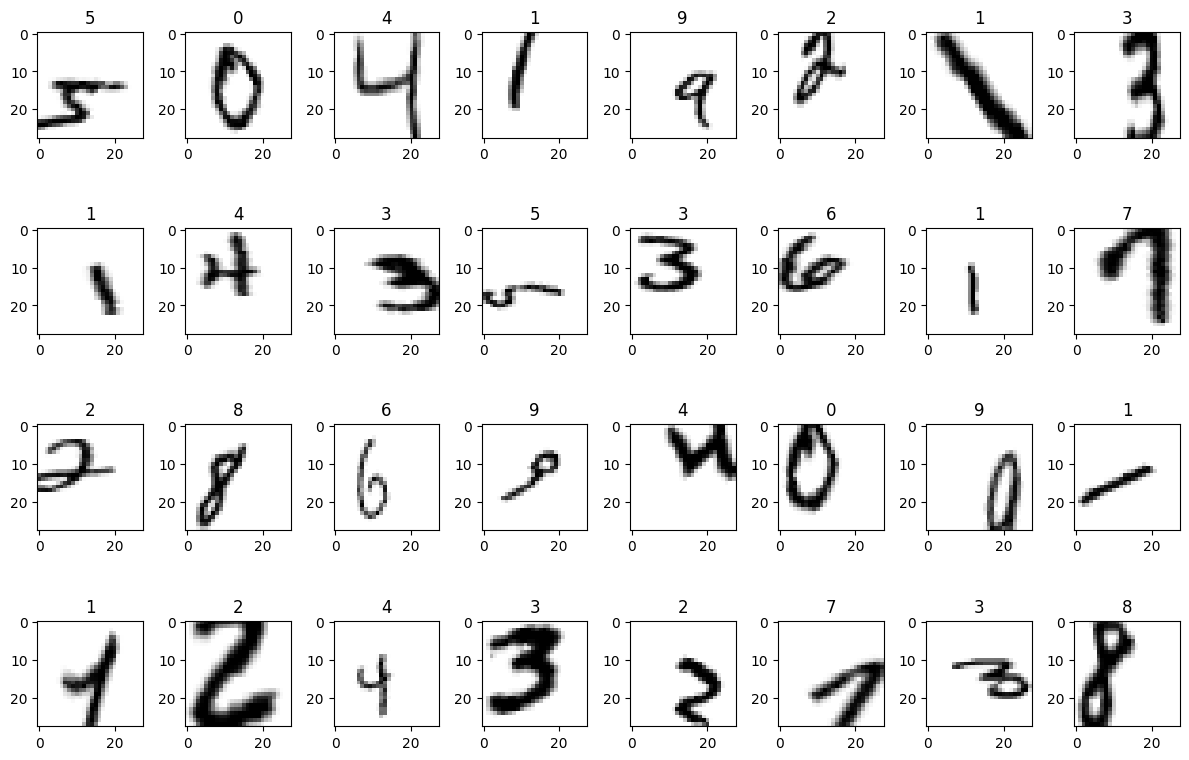

In [5]:
# Define the number of rows and columns for subplot arrangement
rows = 4
columns = 8
num = rows * columns

# Display original images before augmentation
print('BEFORE:\n')
fig1, axes1 = plt.subplots(rows, columns, figsize=(1.5 * columns, 2 * rows))
for i in range(num):
    ax = axes1[i // columns, i % columns]
    ax.imshow(training_X[i].reshape(28, 28), cmap='gray_r')
    label = np.argmax(training_y[i])
    ax.set_title(f'{label}')
plt.tight_layout()
plt.show()

# Display augmented images after applying transformations
print('AFTER:\n')
fig2, axes2 = plt.subplots(rows, columns, figsize=(1.5 * columns, 2 * rows))
for X, y in gendata.flow(training_X, training_y.reshape(training_y.shape[0], 10), batch_size=num, shuffle=False):
    for i in range(0, num):
        ax = axes2[i // columns, i % columns]
        ax.imshow(X[i].reshape(28, 28), cmap='gray_r')
        label = int(np.argmax(y[i]))
        ax.set_title(f'{label}')
    break
plt.tight_layout()
plt.show()


In [6]:
# Define a Sequential model
cnn_model = tf.keras.models.Sequential([
    # Add a 2D convolutional layer with 32 filters, each 3x3, using ReLU activation
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    # Add a max pooling layer with a 2x2 pool size
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # Add another 2D convolutional layer with 64 filters, each 3x3, using ReLU activation
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    # Add another max pooling layer with a 2x2 pool size
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # Add a dropout layer with a dropout rate of 0.5
    tf.keras.layers.Dropout(0.5),
    # Flatten the output to a 1D array
    tf.keras.layers.Flatten(),
    # Add a dense layer with 100 units and ReLU activation
    tf.keras.layers.Dense(100, activation='relu'),
    # Add a dense layer with 10 units (one for each digit) and softmax activation
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model with the Adam optimizer, categorical crossentropy loss, and accuracy metric
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [7]:
# Define the batch size for the training data generator
batch_size = 32

# Creates a training data generator using the pre-configured image data generator
# `flow` is used to generate batches of training data continuously
# The generated batches are used to train the model in batches rather than using the entire training dataset at once
training_gendata = gendata.flow(training_X, training_y, batch_size=batch_size)


In [8]:
# Number of epochs for training
epochs = 150

print('TRAINING MODEL:\n')

# Train the model using the training data generator
# `fit` is used to train the model on the training data generator
# The validation data is used to evaluate the model's performance on unseen data after each epoch
# `steps_per_epoch` and `validation_steps` are used to specify the number of batches to process per epoch
history = cnn_model.fit(
    training_gendata,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(test_X, test_y),
    steps_per_epoch=int(np.ceil(60000 / float(batch_size))),
    validation_steps=int(np.ceil(10000 / float(batch_size)))
)

print('TRAINED MODEL!')


TRAINING MODEL:

Epoch 1/150
   1/1875 ━━━━━━━━━━━━━━━━━━━━ 38:58 1s/step - accuracy: 0.0312 - loss: 2.3171

c:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.4416 - loss: 1.5937 - val_accuracy: 0.9450 - val_loss: 0.2066
Epoch 2/150
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 14us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/150
   7/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.7694 - loss: 0.6705  

c:\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.7633 - loss: 0.7406 - val_accuracy: 0.9507 - val_loss: 0.1568
Epoch 4/150
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 5us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/150
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8083 - loss: 0.5960 - val_accuracy: 0.9694 - val_loss: 0.0999
Epoch 6/150
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 5us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/150
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8296 - loss: 0.5311 - val_accuracy: 0.9697 - val_loss: 0.0944
Epoch 8/150
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 5us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/150
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8374 - loss: 0.5018 - val_accuracy: 0.9782 - val_loss: 0.0678
Epoch 10/150
1875/1875 ━━━━━━━━━━━━━━━━━━━━

In [9]:
cnn_model.save('cnn.h5')